<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/linea_de_espera_un_servidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAS DE ESPERA CON UN SERVIDOR

Los fenómenos de espera, tiene los siguientes elementos en común:
* Llegada al mostrador
* Paso por uno o varios mostradores
* Duración en los que se recibe la atencion con su propio modelo de probabilidad conocido

Existen diferentes escenarios:

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

In [ ]:
def servicio(t):
  if 0 <=t<=3:
    return 5+5*t
  elif 3<t<=5:
    return 20
  elif 5<t<=9:
    return 20-2*(t-5)
  else:
    return 0

In [ ]:
def llegada(t):
  Lambda=0.34
  T=60

  llegadas=[]
  tiempos=[]

  while t <= T:
      U1=rnd.random()
      t=t-np.log(U1) / Lambda
      U2=rnd.random()

      if U2 <= servicio(t) / Lambda:
          TS=t
          llegadas.append(TS)
          tiempos.append(TS)
  return np.mean(tiempos)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


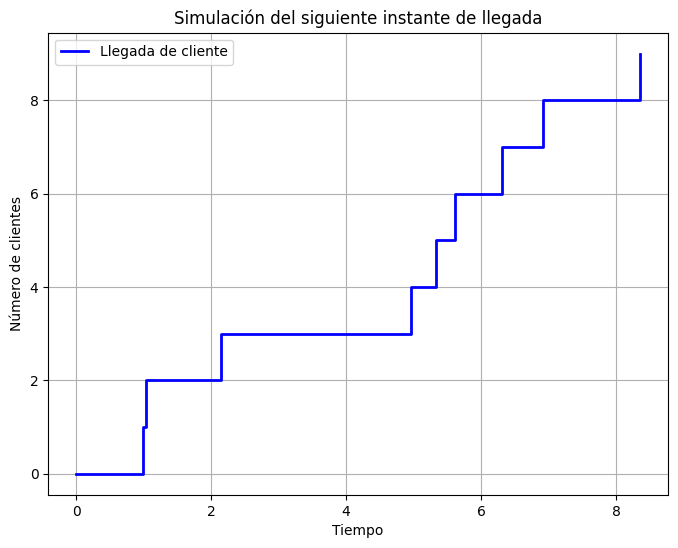

In [ ]:
# Parámetros
Lambda=1.0
T=10
t=0

llegadas = []
tiempos = [t]

while t <= T:
    U1 = rnd.random()
    t = t - np.log(U1) / Lambda
    U2 = rnd.random()

    if U2 <= llegada(t) / Lambda:
        TS = t
        llegadas.append(TS)
        tiempos.append(TS)

# Gráfica
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(tiempos, np.arange(len(tiempos)), where='post', color='blue', lw=2, label="Llegada de cliente")
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes')
plt.title('Simulación del siguiente instante de llegada')
plt.legend()
ax.grid(True)
plt.show()

## COLA DE UN SERVIDOR

### CONCEPTOS:
* **Cola**: Sucesión de entidades que espearn recibir o realizar un servicio.
* **Sistema LIFO**: (Last In, Last Out) Último que entra primero que sale
* Sistema SIRO: (Service in Random Order) En orden aleatorio
* Sistema SPT,SPTF: (Shortest Processing Time First) Los que van a tardar menos se colocan primero
* Sistema PR: (according to PRiority) Los que tiene algún tipo de preferencial

### SUPUESTOS

* El tiempo de espera $Y$ es una variable aleatoria y simulable
* Existe hora de cierre $T$ que no atiende más clientes depués de la hora de cierre
* El sistema no tiene limitaciones de capacidad

### SIMULACION SSD

Permite realizar la simulación con los supuestos anteriores de manera sistemática:

*Variables:*
* $\;\;n\;\;$ : Número de clientes en el sistema en el instante $t$
* $\;\;\;t\;\;\;$ :     Tiempo
* $N_{LL}$ : Número de llegadas hasat el instante $t$
* $N_S\;\;$ : Número de salidas hasta el intante $t$

Tiempo medio: 69.16
Número total de clientes: 24
Número total de servicios: 24


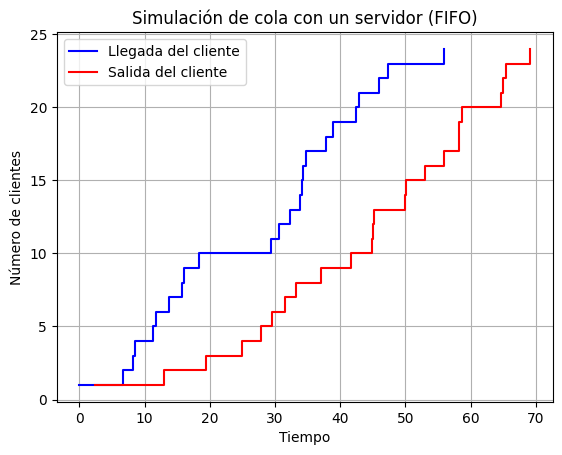

In [ ]:
# Parámetros
t=0
n=0
N_LL=0
N_S=0
T=60
LAMBDA=0.34
MU=0.4
Tp=0

tiempos=[0]
eventos=[0]
LL=[]  #Tiempos de llegada
S=[]   #Tiempos de servicio
t_LL=0  #Tiempo del siguiente evento de llegada
t_s=float('inf')
t_LL=np.mean(tiempos)

while True:
    # CASO 1
    if (t_LL <= t_s) and (t_LL <= T):
        t=t_LL
        N_LL+=1
        n+=1
        LL.append(t)
        t_LL=t-np.log(rnd.random())/LAMBDA  #Tiempo de llegada

        if n==1:
            t_s=t-np.log(rnd.random())/MU

    # CASO 2
    elif (t_LL > t_s) and (t_s <= T):
        t=t_s
        N_S+=1
        n-=1
        S.append(t)

        if n > 0:
            t_s=t-np.log(rnd.random())/MU
        else:
            t_s=float('inf')

    # CASO 3
    elif (t_s > T) and (t_LL > T) and (n > 0):
        t=t_s
        N_S+=1
        n-=1
        S.append(t)

        if n > 0:
            t_s=t-np.log(rnd.random())/MU
        else:
            t_s=float('inf')

    # CASO 4
    elif (t_s > T) and (t_LL > T) and (n == 0):
        Tp = max(0, t - T)
        break

print(f"Tiempo medio: {np.mean(t):.2f}")
print(f"Número total de clientes: {N_LL}")
print(f"Número total de servicios: {N_S}")

# Gráfica
plt.step(LL, np.arange(1, len(LL) + 1), where='post', label='Llegada del cliente', color='blue')
plt.step(S, np.arange(1, len(S) + 1), where='post', label='Salida del cliente', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes')
plt.title('Simulación de cola con un servidor (FIFO)')
plt.legend()
plt.grid(True)
plt.show()